<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session8/blob/main/ERA1S8_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Transformations


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 47774284.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [5]:
import model
import utils

from model import *
from utils import *

## Sample Images

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

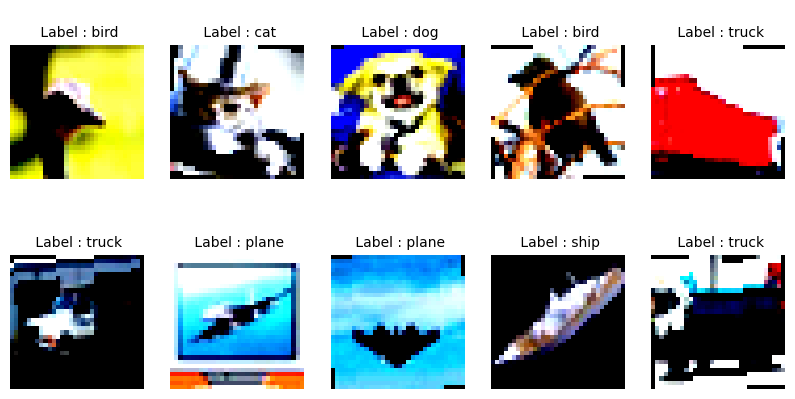

In [6]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [7]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [8]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [9]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    #scheduler.step()
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.2011491060256958 Batch_id=390 Accuracy=41.18: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]



Test set: Average loss: 1.4249, Accuracy: 4840/10000 (48.40%)

EPOCH: 2


Loss=1.1315510272979736 Batch_id=390 Accuracy=55.03: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s]



Test set: Average loss: 1.1550, Accuracy: 5842/10000 (58.42%)

EPOCH: 3


Loss=1.167973518371582 Batch_id=390 Accuracy=59.94: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]



Test set: Average loss: 1.0673, Accuracy: 6195/10000 (61.95%)

EPOCH: 4


Loss=0.9976431131362915 Batch_id=390 Accuracy=62.62: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 1.0119, Accuracy: 6344/10000 (63.44%)

EPOCH: 5


Loss=1.2958743572235107 Batch_id=390 Accuracy=64.41: 100%|██████████| 391/391 [00:45<00:00,  8.61it/s]



Test set: Average loss: 0.9397, Accuracy: 6629/10000 (66.29%)

EPOCH: 6


Loss=0.9554618000984192 Batch_id=390 Accuracy=65.85: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]



Test set: Average loss: 0.9200, Accuracy: 6762/10000 (67.62%)

EPOCH: 7


Loss=0.8299214243888855 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [00:47<00:00,  8.16it/s]



Test set: Average loss: 0.8737, Accuracy: 6894/10000 (68.94%)

EPOCH: 8


Loss=0.7732144594192505 Batch_id=390 Accuracy=68.28: 100%|██████████| 391/391 [00:47<00:00,  8.29it/s]



Test set: Average loss: 0.8374, Accuracy: 7068/10000 (70.68%)

EPOCH: 9


Loss=0.8543255925178528 Batch_id=390 Accuracy=69.35: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]



Test set: Average loss: 0.8273, Accuracy: 7126/10000 (71.26%)

EPOCH: 10


Loss=0.9057039022445679 Batch_id=390 Accuracy=69.90: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.7963, Accuracy: 7187/10000 (71.87%)

EPOCH: 11


Loss=0.7548794150352478 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]



Test set: Average loss: 0.7744, Accuracy: 7276/10000 (72.76%)

EPOCH: 12


Loss=0.9699441194534302 Batch_id=390 Accuracy=71.30: 100%|██████████| 391/391 [00:47<00:00,  8.17it/s]



Test set: Average loss: 0.7786, Accuracy: 7269/10000 (72.69%)

EPOCH: 13


Loss=1.0099477767944336 Batch_id=390 Accuracy=72.27: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.7294, Accuracy: 7468/10000 (74.68%)

EPOCH: 14


Loss=0.7979052066802979 Batch_id=390 Accuracy=73.00: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]



Test set: Average loss: 0.7542, Accuracy: 7376/10000 (73.76%)

EPOCH: 15


Loss=0.7859027981758118 Batch_id=390 Accuracy=73.14: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]



Test set: Average loss: 0.7066, Accuracy: 7556/10000 (75.56%)

EPOCH: 16


Loss=0.7322776913642883 Batch_id=390 Accuracy=73.86: 100%|██████████| 391/391 [00:45<00:00,  8.60it/s]



Test set: Average loss: 0.7019, Accuracy: 7553/10000 (75.53%)

EPOCH: 17


Loss=0.98817378282547 Batch_id=390 Accuracy=74.48: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s]



Test set: Average loss: 0.7036, Accuracy: 7544/10000 (75.44%)

EPOCH: 18


Loss=0.6777505278587341 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 0.7015, Accuracy: 7537/10000 (75.37%)

EPOCH: 19


Loss=0.8209012746810913 Batch_id=390 Accuracy=74.88: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.6643, Accuracy: 7670/10000 (76.70%)

EPOCH: 20


Loss=0.8053750991821289 Batch_id=390 Accuracy=75.34: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.6802, Accuracy: 7651/10000 (76.51%)



In [10]:
train_losses1 = [t.cpu().item() for t in train_losses]

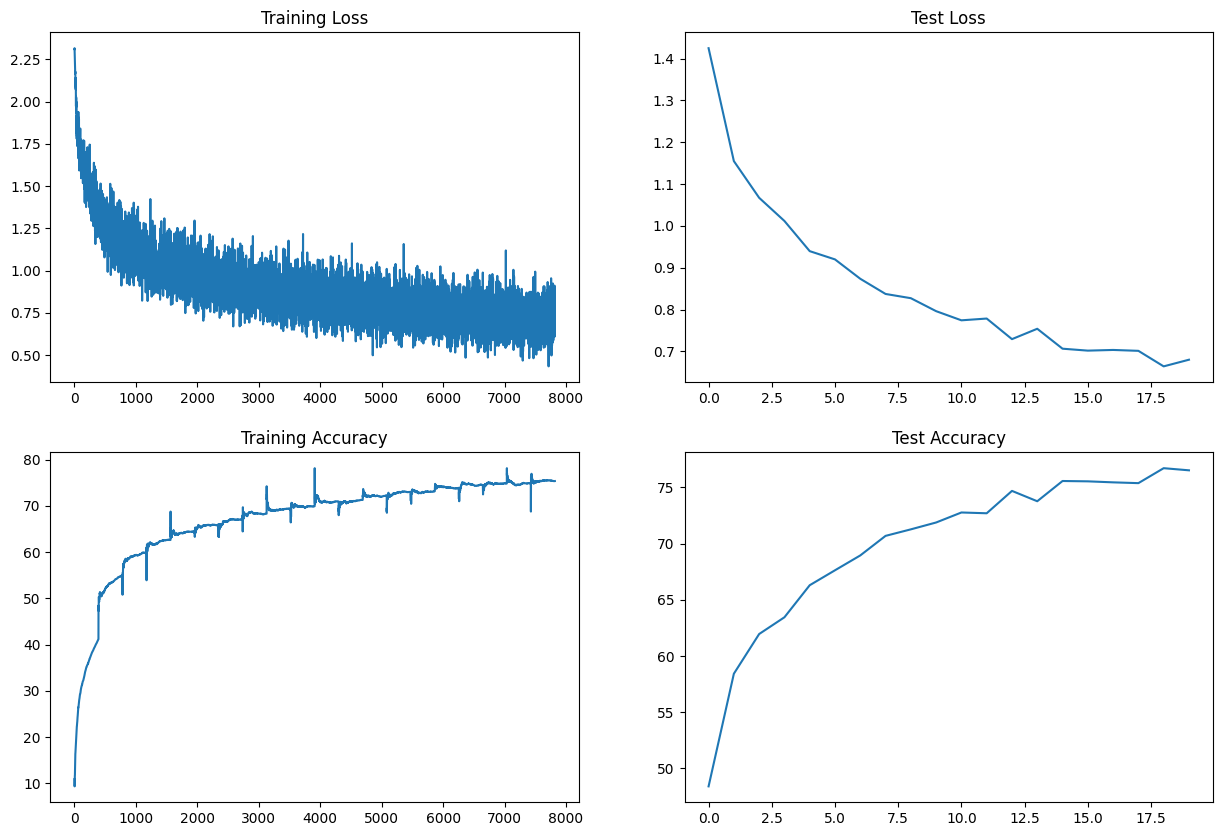

In [11]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [12]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

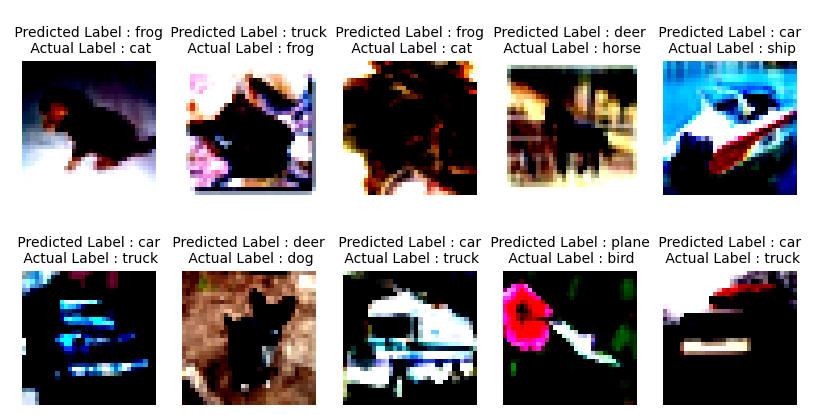

In [13]:
display_incorrect_images(wrong_prediction_list, n=10 )